In [104]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

#importing helper libruaries
import numpy as np
import matplotlib.pyplot as plt

#cheking tensorflow version

print(tf. __version__)


2.7.0


In [105]:
#Import the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [106]:
#train preview
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [107]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [108]:
#class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [109]:
#checking the shape of train and test images
print("train_images shape\n {}".format(train_images.shape))
print("**"*15)
print("test_images shape\n {}".format(test_images.shape))

train_images shape
 (60000, 28, 28)
******************************
test_images shape
 (10000, 28, 28)


In [110]:
#checking the shape of train  labels
train_labels.shape

(60000,)

In [111]:
#checking the shape of test labels
test_labels.shape

(10000,)

In [112]:
#checkin the len
len(test_labels)

10000

**Preprocess the data**

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

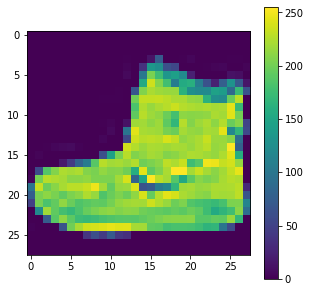

In [113]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False);

**Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:**

In [114]:
#scaling the images by 255 so that it ranges between 0 to 1
# It's important that the training set and the testing set be preprocessed in the same way.
train_images = train_images/255.0
test_images = test_images/255.0


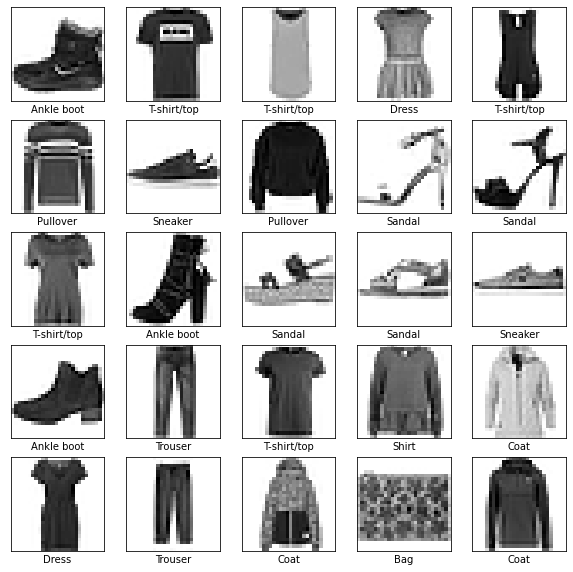

In [115]:
#confirming the scaling is done

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##.  **Building the model**

In [116]:
#creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(10)
])

1. tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
2. The first Dense layer has 128 nodes (or neurons)
3. The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compile the model

1. Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

2. Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its 3. loss function.

3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [117]:
#compile# if the target is binary we use binarycrossentropy as a loss function.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model
1. Training the neural network model requires the following steps:

2. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
3. The model learns to associate images and labels.
4. You ask the model to make predictions about a test set—in this example, the test_images array.
5. Verify that the predictions match the labels from the test_labels array.

In [118]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8527 - accuracy: 0.7956
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6515 - accuracy: 0.8110
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6252 - accuracy: 0.8167
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6015 - accuracy: 0.8247
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5877 - accuracy: 0.8268
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5756 - accuracy: 0.8298
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5623 - accuracy: 0.8328
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5526 - accuracy: 0.8378
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5446 - accuracy: 0.8369
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.542

the model reached an accuracy of 91%

In [119]:
#installing docs package
#!pip install git+https://github.com/tensorflow/docs

In [120]:
#calling the libraries
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [121]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5428 - accuracy: 0.8361 - 562ms/epoch - 2ms/step

Test accuracy: 0.8360999822616577


accuracy on the test dataset is abit low at 88%

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data

#**Make predictions**

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [122]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [123]:
predictions = probability_model.predict(test_images)

In [138]:
#Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:


predictions[0]

array([6.7112682e-04, 2.8074173e-05, 2.6398094e-04, 6.1895887e-05,
       2.5411081e-04, 1.4055400e-01, 3.7765288e-04, 2.1060908e-01,
       3.6643397e-02, 6.1053669e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [136]:
np.argmax(predictions[0])

9

In [139]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [140]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

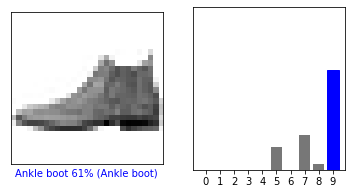

In [144]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

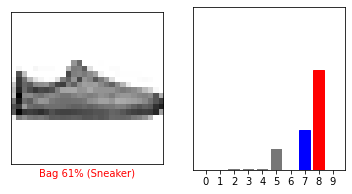

In [145]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.



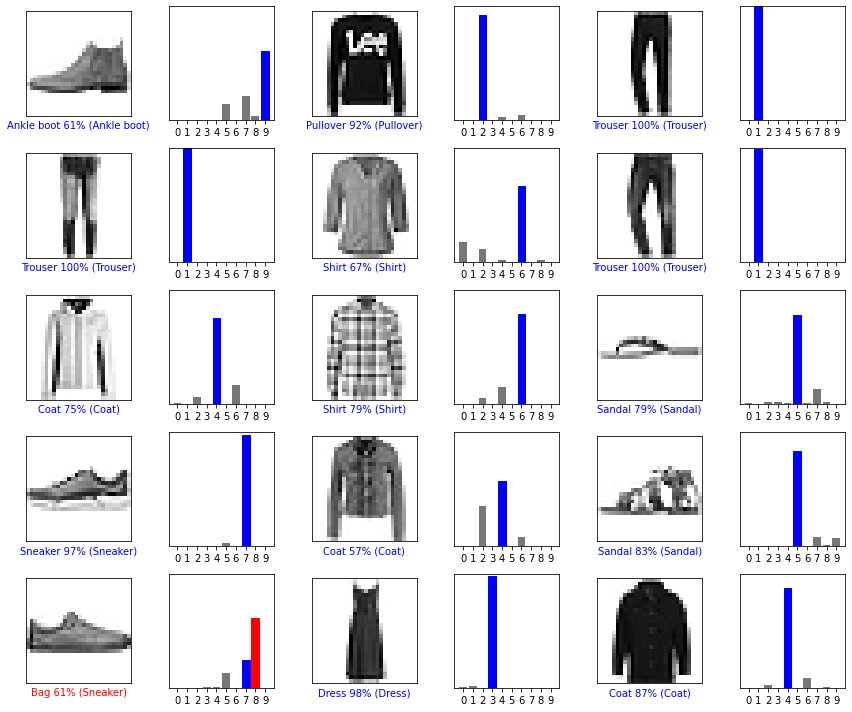

In [146]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Use the trained model**

Finally, use the trained model to make a prediction about a single image.

In [147]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [148]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


**Now predict the correct label for this image:**

In [149]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.5232613e-03 1.7369168e-05 9.2276931e-01 1.1031916e-05 2.9434148e-02
  5.3130059e-08 4.4106171e-02 1.0341282e-09 1.3859925e-04 3.1611126e-08]]


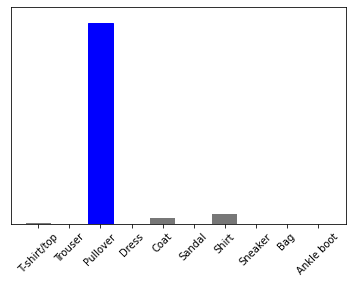

In [157]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [151]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected



END